# TP 04 PRENOM - NOM - GROUPE


## Étude de cas: la plateforme Netflix

Merci de respecter scrupuleusement la structure prédéfinie (et de ne pas en ajouter).

Il y a une section par question. Répondez à toutes les sous-questions en créant autant de cellules que vous jugez nécessaires.

In [49]:
# import nécessaires
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# définition éventuelle des chemins nécessaires --> on ne doit plus trouver de chemin écrit en "dur" au delà de cette section ! Tous doivent faire référence à ce chemin.

# Chemin vers votre fichier CSV
path = './data.csv'  # Remplacez ceci par le chemin réel de votre fichier CSV


### Q1: Lisez le fichier

In [30]:
# Lire le fichier CSV dans un DataFrame
df = pd.read_csv(path)

# Afficher les premières lignes du DataFrame pour vérifier
print(df)

                                                Titre   Type  Duree  \
0                                        Interstellar   Film    169   
1                                        Breaking Bad  Série     49   
2                            The Shawshank Redemption   Film    142   
3                                     Stranger Things  Série     60   
4                                       The Godfather   Film    175   
5                                             Friends  Série     22   
6                                        Pulp Fiction   Film    154   
7                                          The Office  Série     22   
8                               The Dark Knight Rises   Film    165   
9                                         Money Heist  Série     70   
10                                        The Witcher  Série     60   
11              The Lord of the Rings: The Two Towers   Film    179   
12                                    The Mandalorian  Série     40   
13    

### Q2: Affichez les dimensions du dataframe

In [31]:
dimensions = df.shape
print("Dimensions du DataFrame : ", dimensions)

Dimensions du DataFrame :  (33, 6)


### Q3: Comptez les films et les séries

In [32]:
# Compter les films et les séries
comptage = df['Type'].value_counts()
print("Comptage des films et des séries :\n", comptage)


Comptage des films et des séries :
 Type
Film     21
Série    12
Name: count, dtype: int64


### Q4: Générez le résumé statistique du dataframe

In [33]:
resume_statistique = df.describe()
print("Résumé statistique du DataFrame : \n", resume_statistique)

Résumé statistique du DataFrame : 
             Duree        Annee
count   33.000000    33.000000
mean   104.454545  2004.484848
std     55.132279    12.932810
min     22.000000  1972.000000
25%     60.000000  1999.000000
50%    109.000000  2005.000000
75%    148.000000  2014.000000
max    201.000000  2022.000000


### Q5: les valeurs manquantes

In [34]:
# Vérifier les valeurs manquantes dans le DataFrame
valeurs_manquantes = df.isnull().sum()
print("Valeurs manquantes dans le DataFrame :\n", valeurs_manquantes)


Valeurs manquantes dans le DataFrame :
 Titre      0
Type       0
Duree      0
Pays       0
Acteurs    0
Annee      0
dtype: int64


### Q6: Les lignes dupliquées

In [35]:
# Identifier les lignes dupliquées dans le DataFrame
lignes_dupliquees = df[df.duplicated()]
print("Lignes dupliquées :\n", lignes_dupliquees)
# Supprimer les lignes dupliquées et mettre à jour le DataFrame
df_sans_dupliques = df.drop_duplicates()


Lignes dupliquées :
 Empty DataFrame
Columns: [Titre, Type, Duree, Pays, Acteurs, Annee]
Index: []


### Q7: Regardons les pays d'origine.

In [36]:
# Obtenir les pays d'origine des films et séries
pays_origine = df['Pays'].value_counts()
print("Pays d'origine des films et séries :\n", pays_origine)


Pays d'origine des films et séries :
 Pays
États-Unis     24
France          5
Royaume-Uni     2
Espagne         1
Japon           1
Name: count, dtype: int64


### Q8: Regardons la durée des films.

In [37]:
# Résumé statistique de la durée des films
resume_stat_duree = df[df['Type'] == 'Film']['Duree'].describe()
print("Résumé statistique de la durée des films :\n", resume_stat_duree)


Résumé statistique de la durée des films :
 count     21.000000
mean     139.857143
std       32.697532
min       83.000000
25%      114.000000
50%      138.000000
75%      169.000000
max      201.000000
Name: Duree, dtype: float64


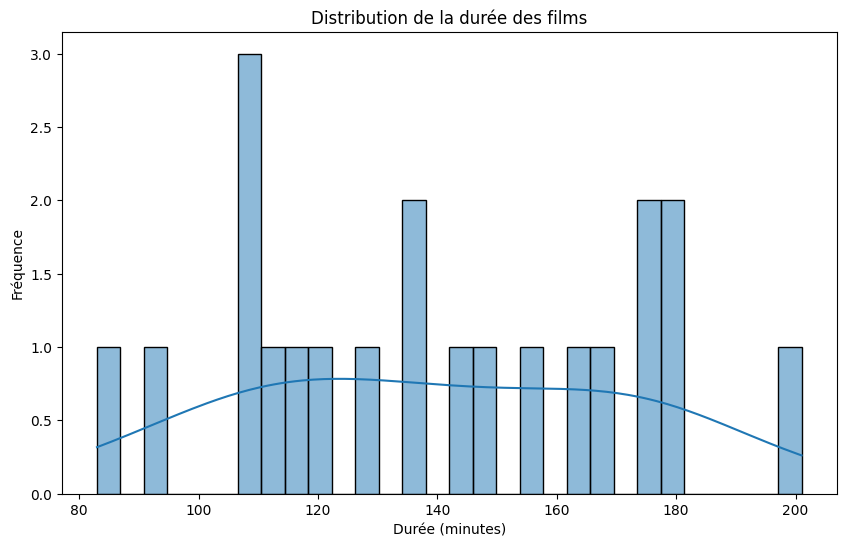

In [38]:
# Visualisation de la distribution de la durée des films
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Type'] == 'Film']['Duree'], bins=30, kde=True)
plt.title('Distribution de la durée des films')
plt.xlabel('Durée (minutes)')
plt.ylabel('Fréquence')
plt.show()


### Q9: Quel sont les titres de film français les plus long et quels est leur longueur ?

In [42]:
films_francais = df[(df['Type'] == 'Film') & (df['Pays'] == 'France')]
film_plus_long = films_francais.nlargest(1, 'Duree')
if not film_plus_long.empty:
    titre_plus_long = film_plus_long['Titre'].values[0]
    duree_plus_long = film_plus_long['Duree'].values[0]

    print(f"Le film français le plus long est '{titre_plus_long}' avec une durée de {duree_plus_long} minutes.")
else:
    print("Aucun film français trouvé.")


Le film français le plus long est 'Asterix aux jeux olympiques' avec une durée de 116 minutes.


### Q10: Regardons les acteurs d'un peu plus près (colonne `cast`).

In [44]:
# Séparer et obtenir la liste des acteurs uniques
tous_acteurs = df['Acteurs'].explode().unique()
print("Liste des acteurs uniques :\n", tous_acteurs)

Liste des acteurs uniques :
 ['Matthew McConaughey,Anne Hathaway' 'Bryan Cranston,Aaron Paul'
 'Tim Robbins,Morgan Freeman' 'Millie Bobby Brown,Finn Wolfhard'
 'Marlon Brando,Al Pacino' 'Jennifer Aniston,Courteney Cox'
 'John Travolta,Samuel L. Jackson' 'Steve Carell,Rainn Wilson'
 'Christian Bale,Tom Hardy' 'Úrsula Corberó,Álvaro Morte'
 'Henry Cavill,Freya Allan' 'Elijah Wood,Ian McKellen'
 'Pedro Pascal,Gina Carano' 'Keanu Reeves,Laurence Fishburne'
 'Jesse Eisenberg,Andrew Garfield' 'Olivia Colman,Tobias Menzies'
 'Johnny Galecki,Jim Parsons' 'Ricky Gervais,Martin Freeman'
 'Theo James,Lara Pulver' 'Keanu Reeves,Carrie-Anne Moss'
 'Robert Aramayo,Joseph Mawle' 'Mayumi Tanaka,Akemi Okamura'
 'Robert De Niro,Jodie Foster' 'Samy Naceri,Frederic Diefenthal'
 'Christian Clavier,Gerard Depardieu' 'Clovis Cornillac,Benoît Poelvoorde'
 'Edouard Baer,Gerard Depardieu']


In [45]:
films_keanu_reeves = df[df['Acteurs'].apply(lambda x: 'Keanu Reeves' in x)]
print("Films avec Keanu Reeves :\n", films_keanu_reeves)

Films avec Keanu Reeves :
                        Titre  Type  Duree        Pays  \
13       The Matrix Reloaded  Film    138  États-Unis   
14    The Matrix Revolutions  Film    129  États-Unis   
21                The Matrix  Film    136  États-Unis   
23  The Matrix Resurrections  Film    148  États-Unis   

                            Acteurs  Annee  
13  Keanu Reeves,Laurence Fishburne   2003  
14  Keanu Reeves,Laurence Fishburne   2003  
21  Keanu Reeves,Laurence Fishburne   1999  
23    Keanu Reeves,Carrie-Anne Moss   2021  


In [46]:
# Recherche des films/séries pour un acteur spécifique (par exemple, 'Keanu Reeves')
films_keanu_reeves = df[df['Acteurs'].str.contains('Keanu Reeves')]

# Affichage des films/séries pour cet acteur
print(films_keanu_reeves)


                       Titre  Type  Duree        Pays  \
13       The Matrix Reloaded  Film    138  États-Unis   
14    The Matrix Revolutions  Film    129  États-Unis   
21                The Matrix  Film    136  États-Unis   
23  The Matrix Resurrections  Film    148  États-Unis   

                            Acteurs  Annee  
13  Keanu Reeves,Laurence Fishburne   2003  
14  Keanu Reeves,Laurence Fishburne   2003  
21  Keanu Reeves,Laurence Fishburne   1999  
23    Keanu Reeves,Carrie-Anne Moss   2021  


### Q11: Concentrons-nous sur les dates d'ajout

In [48]:
distribution_annees = df['Annee'].value_counts().sort_index()
print("Distribution des années :\n", distribution_annees)


Distribution des années :
 Annee
1972    2
1976    1
1994    3
1999    3
2001    2
2002    2
2003    3
2005    1
2007    2
2008    2
2010    1
2012    2
2014    1
2016    2
2017    1
2019    2
2021    2
2022    1
Name: count, dtype: int64


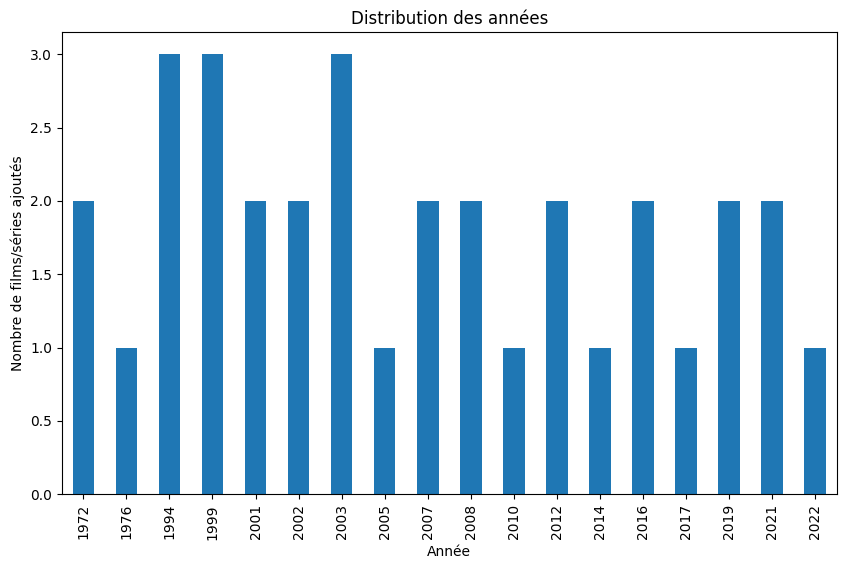

In [50]:
plt.figure(figsize=(10, 6))
distribution_annees.plot(kind='bar')
plt.title('Distribution des années')
plt.xlabel('Année')
plt.ylabel('Nombre de films/séries ajoutés')
plt.show()


### Q12: Évolution du nombre de films/séries produits par le top 10 des pays producteurs au fil des ans

In [51]:
top_10_pays = df['Pays'].value_counts().head(10).index.tolist()

In [52]:
sous_ensembles_pays = {pays: df[df['Pays'] == pays] for pays in top_10_pays}

In [54]:
nombre_par_an = {}
for pays, subset in sous_ensembles_pays.items():
    nombre_par_an[pays] = subset['Annee'].value_counts().sort_index()


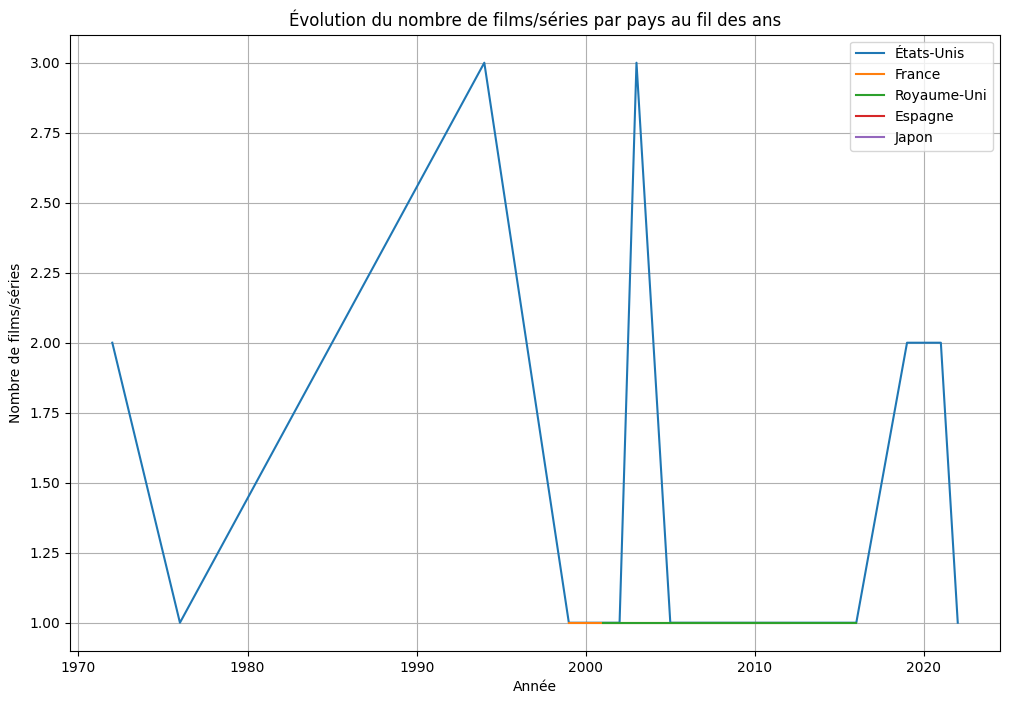

In [55]:
plt.figure(figsize=(12, 8))
for pays, data in nombre_par_an.items():
    plt.plot(data.index, data.values, label=pays)

plt.title('Évolution du nombre de films/séries par pays au fil des ans')
plt.xlabel('Année')
plt.ylabel('Nombre de films/séries')
plt.legend()
plt.grid(True)
plt.show()


### Q13: Étudions la distribuion de la durée des films disponibles sur Netflix.

### Q14: Étudions les séries télévisées.